In [337]:
# Author: Julian
import pandas as pd
from pathlib import Path
from datetime import datetime
import seaborn as sns
from pyparsing import alphas

from requests import session
from seaborn import kdeplot

In [329]:
js_passed = pd.read_csv( "js_total_passed.csv")
js_passed["team"] = "js"
js_passed.drop(columns="id6 628 ", inplace=True, axis="columns")


j_handed = pd.read_csv( "j_handed_out.csv")
j_handed["person"] = "j"
s_handed = pd.read_csv( "s_handed_out.csv")
s_handed["person"] = "s"
js_handed = pd.concat([j_handed, s_handed], ignore_index=True)[["count", "date", "time", "person"]]
js_handed["team"] = "js"
js_handed.sort_values(by=["time"], inplace=True)



In [330]:
v_passed_second_half = pd.read_csv("v_passed_second_half.csv")
v_passed_second_half.drop(columns="id2 117 ", inplace=True, axis="columns")
v_handed_second_half = pd.read_csv("v_handed_out_second_half.csv")
v_handed_second_half.drop(columns="id1 31 ", inplace=True, axis="columns")
v_handed_second_half["team"] = "vw"
v_passed_second_half["team"] = "vw"
v_handed_second_half["person"] = "v"
v_passed_second_half["person"] = "v"

w_handed_second_half = pd.read_csv("w_handed_out_second_half.csv")
w_handed_second_half.drop(columns="id1 46 ", inplace=True, axis="columns")
w_passed_second_half = pd.read_csv("w_passed_second_half.csv")
w_passed_second_half.drop(columns="id2 194 ", inplace=True, axis="columns")
w_handed_second_half["team"] = "vw"
w_passed_second_half["team"] = "vw"
w_handed_second_half["person"] = "w"
w_passed_second_half["person"] = "w"

vw_passed_second_half = pd.concat([v_passed_second_half, v_handed_second_half, w_passed_second_half], ignore_index=True)
vw_passed_second_half.sort_values(by=["time"], inplace=True)

vw_handed_second_half = pd.concat([w_handed_second_half, v_handed_second_half], ignore_index=True)
vw_handed_second_half.sort_values(by=["time"], inplace=True)

vw_passed_first_half = pd.read_csv("vw_total_first_half_vetle.csv")
vw_passed_first_half["team"] = "vw"
vw_handed_first_half = vw_passed_first_half.loc[vw_passed_first_half["id"] == 2, :].copy()

vw_passed_first_half.drop(columns="id", inplace=True)
vw_handed_first_half.drop(columns="id", inplace=True)

vw_passed = pd.concat([vw_passed_first_half, vw_passed_second_half], ignore_index=True)
vw_handed = pd.concat([vw_handed_first_half, vw_handed_second_half], ignore_index=True)

v_passed_second_half = pd.concat([v_passed_second_half, v_handed_second_half], ignore_index=True)
v_passed_second_half.sort_values(by=["time"], inplace=True)
#v_handed_second_half

#w_passed_second_half
#w_handed_second_half


In [349]:

def add_time_from_start_15_35(df):
    df["timestamp"] = pd.to_datetime(df["date"] + " " + df["time"])
    
    # Define start time
    start_time = datetime.strptime("2024-11-01 15:35:00", "%Y-%m-%d %H:%M:%S")
    
    # Calculate seconds after start
    df["seconds_after_start"] = (df["timestamp"] - start_time).dt.total_seconds()
    
    return df

# Apply the function to each DataFrame
js_passed = add_time_from_start_15_35(js_passed)
vw_passed = add_time_from_start_15_35(vw_passed)
js_handed = add_time_from_start_15_35(js_handed)
vw_handed = add_time_from_start_15_35(vw_handed)
v_passed_second_half = add_time_from_start_15_35(v_passed_second_half)
v_handed_second_half = add_time_from_start_15_35(v_handed_second_half)
w_passed_second_half = add_time_from_start_15_35(w_passed_second_half)
w_handed_second_half = add_time_from_start_15_35(w_handed_second_half)
vw_handed_first_half = add_time_from_start_15_35(vw_handed_first_half)
vw_passed_first_half = add_time_from_start_15_35(vw_passed_first_half)


In [351]:
vw_passed_first_half

,count,date,time,team,timestamp,seconds_after_start
0,1,2024-11-01,15:36:40.588,vw,2024-11-01 15:36:40.588,100.588
1,2,2024-11-01,15:37:21.046,vw,2024-11-01 15:37:21.046,141.046
2,3,2024-11-01,15:37:59.417,vw,2024-11-01 15:37:59.417,179.417
3,4,2024-11-01,15:38:39.674,vw,2024-11-01 15:38:39.674,219.674
4,5,2024-11-01,15:38:59.230,vw,2024-11-01 15:38:59.230,239.230
...,...,...,...,...,...,...
169,30,2024-11-01,16:02:42.735,vw,2024-11-01 16:02:42.735,1662.735
170,31,2024-11-01,16:02:47.398,vw,2024-11-01 16:02:47.398,1667.398
171,6,2024-11-01,16:02:54.131,vw,2024-11-01 16:02:54.131,1674.131
172,32,2024-11-01,16:02:54.727,vw,2024-11-01 16:02:54.727,1674.727


In [352]:
vw_handed_first_half

,count,date,time,team,timestamp,seconds_after_start
5,1,2024-11-01,15:42:35.394,vw,2024-11-01 15:42:35.394,455.394
6,2,2024-11-01,15:42:35.544,vw,2024-11-01 15:42:35.544,455.544
7,3,2024-11-01,15:42:35.693,vw,2024-11-01 15:42:35.693,455.693
8,4,2024-11-01,15:42:35.844,vw,2024-11-01 15:42:35.844,455.844
9,5,2024-11-01,15:42:35.977,vw,2024-11-01 15:42:35.977,455.977
...,...,...,...,...,...,...
168,29,2024-11-01,16:02:31.365,vw,2024-11-01 16:02:31.365,1651.365
169,30,2024-11-01,16:02:42.735,vw,2024-11-01 16:02:42.735,1662.735
170,31,2024-11-01,16:02:47.398,vw,2024-11-01 16:02:47.398,1667.398
172,32,2024-11-01,16:02:54.727,vw,2024-11-01 16:02:54.727,1674.727


<Axes: xlabel='seconds_after_start', ylabel='Count'>

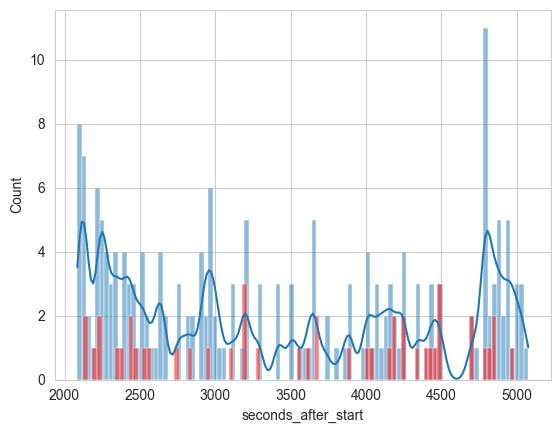

In [355]:
plt = sns.histplot(w_passed_second_half["seconds_after_start"], binwidth=30, kde=True, kde_kws={"bw_adjust": 0.1})
sns.histplot(w_handed_second_half["seconds_after_start"], binwidth=30, color="red", alpha=0.5)

In [304]:
# give me a list of timestamps for each 30 second intervals that do not have any data

def get_missing_intervals(df, interval_length= 30):
    # Get the minimum and maximum
    min_time = df["seconds_after_start"].min()
    max_time = df["seconds_after_start"].max()
    
    # Create a list of all the intervals
    intervals = list(range(int(min_time), int(max_time), interval_length))
    
    # Get the intervals that do not contain any data in the DataFrame
    missing_intervals = [interval for interval in intervals if not ((df["seconds_after_start"] >= interval) & (df["seconds_after_start"] < interval + interval_length)).any()]
    
    
    # if intervales connected, keep last
    for i in range(1, len(missing_intervals)):
        if missing_intervals[i] - missing_intervals[i-1] == interval_length:
            missing_intervals[i-1] = None
            pass
    
    return missing_intervals

# Get the missing intervals for each DataFrame
js_passed_pauses_1 = get_missing_intervals(js_passed, 30)[:2]


In [305]:
def plot_session(df, start_times):
    plt = sns.histplot(df["seconds_after_start"], binwidth=30, kde=True, kde_kws={"bw_adjust": 0.1})
    plt.vlines(start_times, 0, 20, colors="red", linestyles="dashed", label="Session Start times", alpha=0.5)
    
    for interval in start_times:
        if interval is not None:
            plt.text(interval, 21, str(interval / 60), rotation=45, verticalalignment='bottom')

In [327]:
js_start_times = missing_intervals = [7] + get_missing_intervals(js_passed.loc[js_passed["seconds_after_start"] < 2100, :] , 30) + get_missing_intervals(js_passed.loc[js_passed["seconds_after_start"] > 1200, :] , 50) 
plot_session(js_passed, js_start_times)


KeyError: 'seconds_after_start'

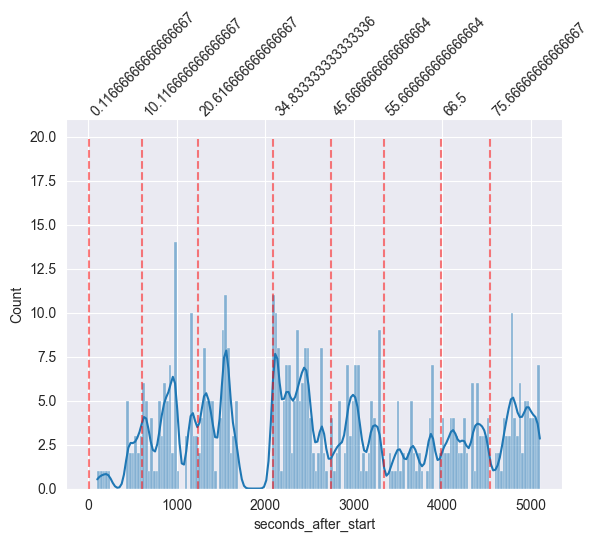

In [307]:
plot_session(vw_passed, js_start_times)

In [318]:
def parse_data_to_session(session_splits=5):
    start_times = [start_time for start_time in js_start_times if start_time is not None]
    mid_start_times = []
    for j in range(len(start_times)):
        mid_start_times.extend([start_times[j] + (600 / session_splits) * i for i in range(1, session_splits)])
    start_times = start_times + mid_start_times
    start_times.sort()
    df = pd.DataFrame({ "session_starts": start_times * 2})
    treatment_list = ([1] * session_splits + [0] * session_splits) * 4 + ([0] * session_splits + [1] * session_splits) * 4
    df["treatment"] = treatment_list
    df["team"] = ["js"] * 8 * session_splits + ["vw"] * 8 * session_splits
    # add handed out per session to the df by counting the number of entries in the handed out dataframes that are within the session
    df["handed_out"] = 0
    df["passed_by"] = 0
    df["session_within_session"] = 0
    for i in range(len(df)):
        start_time = df["session_starts"][i]
        end_time = df["session_starts"][i + 1] if i < len(df) - 1 and df["session_starts"][i + 1] > start_time else max(max(js_passed["seconds_after_start"]), max(vw_passed["seconds_after_start"]))
        if df.loc[i, "team"] == "js":
            handed_out = js_handed
            passed_by = js_passed
        else:
            handed_out = vw_handed
            passed_by = vw_passed
        df.loc[i, "handed_out"] = handed_out.loc[(handed_out["seconds_after_start"] >= start_time) & (handed_out["seconds_after_start"] < end_time), "count"].count()
        df.loc[i, "passed_by"] = passed_by.loc[(passed_by["seconds_after_start"] >= start_time) & (passed_by["seconds_after_start"] < end_time), "count"].count()
        df.loc[i, "session_within_session"] = i % session_splits
    df["success_rate"]  = df["handed_out"] / df["passed_by"]
    df_no_zeros = df.loc[df["passed_by"] != 0, :]
    print("Session splits: ", session_splits)
    print("Std", df_no_zeros.groupby(["team", "treatment"]).std())
    print("Mean", df_no_zeros.groupby(["team", "treatment"]).mean())
    df_no_zeros.to_csv(f"{session_splits}_sessions_vw_only_v.csv", index=False)
    return df_no_zeros

In [319]:
for i in [1, 2, 3, 5, 10, 20]:
    parse_data_to_session(i)

Session splits:  1
Std                 session_starts  handed_out  passed_by  session_within_session  \
team treatment                                                                  
js   0             1686.763839    1.290994  37.170777                     0.0   
     1             1737.982451    4.031129  18.912077                     0.0   
vw   0             1737.982451   21.391198  23.622024                     0.0   
     1             1686.763839   24.779023  28.593414                     0.0   

                success_rate  
team treatment                
js   0              0.133912  
     1              0.039765  
vw   0              0.241700  
     1              0.289776  
Mean                 session_starts  handed_out  passed_by  session_within_session  \
team treatment                                                                  
js   0                 2644.25       16.50      82.50                     0.0   
     1                 1993.50       19.75      74.50   

In [362]:
def parse_data_to_session_v_and_w_split(session_splits=5):
    start_times = [start_time for start_time in js_start_times if start_time is not None]
    mid_start_times = []
    for j in range(len(start_times)):
        mid_start_times.extend([start_times[j] + (600 / session_splits) * i for i in range(1, session_splits)])
    start_times = start_times + mid_start_times
    start_times.sort()
    df = pd.DataFrame({ "session_starts": start_times * 2 + start_times[-5*session_splits:]})
    print(len(df["session_starts"]))
    treatment_list = ([1] * session_splits + [0] * session_splits) * 4 + ([0] * session_splits + [1] * session_splits + [0] * session_splits) + (([1] * session_splits + [0] * session_splits) * 2 + ([1] * session_splits)) * 2
    df["treatment"] = treatment_list
    df["team"] = ["js"] * 8 * session_splits + ["vw"] * 3 * session_splits + ["v"] * 5 * session_splits + ["w"] * 5 * session_splits
    # add handed out per session to the df by counting the number of entries in the handed out dataframes that are within the session
    df["handed_out"] = 0
    df["passed_by"] = 0
    df["session_within_session"] = 0
    for i in range(len(df)):
        start_time = df["session_starts"][i]
        end_time = df["session_starts"][i + 1] if i < len(df) - 1 and df["session_starts"][i + 1] > start_time else max(max(js_passed["seconds_after_start"]), max(vw_passed["seconds_after_start"]))
        if df.loc[i, "team"] == "js":
            handed_out = js_handed
            passed_by = js_passed
        elif df.loc[i, "team"] == "vw":
            handed_out = vw_handed_first_half
            passed_by = vw_passed_first_half
        elif df.loc[i, "team"] == "v":
            handed_out = v_handed_second_half
            passed_by = v_passed_second_half
        elif df.loc[i, "team"] == "w":
            handed_out = w_handed_second_half
            passed_by = w_passed_second_half
        else:
            raise ValueError("Invalid team")
        df.loc[i, "handed_out"] = handed_out.loc[(handed_out["seconds_after_start"] >= start_time) & (handed_out["seconds_after_start"] < end_time), "count"].count()
        df.loc[i, "passed_by"] = passed_by.loc[(passed_by["seconds_after_start"] >= start_time) & (passed_by["seconds_after_start"] < end_time), "count"].count()
        df.loc[i, "session_within_session"] = i % session_splits
    df["success_rate"]  = df["handed_out"] / df["passed_by"]
    df_no_zeros = df.loc[df["passed_by"] != 0, :]
    print("Session splits: ", session_splits)
    print("Std", df_no_zeros.groupby(["team", "treatment"]).std())
    print("Mean", df_no_zeros.groupby(["team", "treatment"]).mean())
    df_no_zeros.to_csv(f"{session_splits}_sessions_v_and_w_split_second_half.csv", index=False)
    return df_no_zeros

In [395]:
df = parse_data_to_session_v_and_w_split(1)

21
Session splits:  1
Std                 session_starts  handed_out  passed_by  session_within_session  \
team treatment                                                                  
js   0             1686.763839    1.290994  37.170777                     0.0   
     1             1737.982451    4.031129  18.912077                     0.0   
v    0              883.883476    0.000000   6.363961                     0.0   
     1             1225.085031    4.000000  13.527749                     0.0   
vw   0              869.741341   31.819805  35.355339                     0.0   
     1                     NaN         NaN        NaN                     NaN   
w    0              883.883476    4.242641   2.121320                     0.0   
     1             1225.085031    3.605551  21.126603                     0.0   

                success_rate  
team treatment                
js   0              0.133912  
     1              0.039765  
v    0              0.043233  
     1  

**Trying to build data that contains for each hand out the number of passed by since the last hand out**

,session_starts,treatment,team,handed_out,passed_by,session_within_session,success_rate
0,7,1,js,22,79,0,0.278481
1,607,0,js,15,126,0,0.119048
2,1237,1,js,24,99,0,0.242424
3,2090,0,js,16,99,0,0.161616
4,2740,1,js,18,56,0,0.321429
5,3340,0,js,18,43,0,0.418605
6,3990,1,js,15,64,0,0.234375
7,4540,0,js,17,62,0,0.274194
8,7,0,vw,12,22,0,0.545455
9,607,1,vw,63,80,0,0.787500


In [389]:
def add_success_column(df_passed, df_handed):
    df_passed["success"] = False
    for item in df_handed["seconds_after_start"]:
        # get the closest datapoint in df to the handout and increase its success rate
        closest_dps_in_df = list(df_passed["seconds_after_start"].sub(item).abs().sort_values().index)
        # if it is zero increase to 1 otherwise increase the closest datapoint by one 
        for idx in closest_dps_in_df:
            if not df_passed.loc[idx, "success"]:
                df_passed.loc[idx, "success"] = True
                break
    return df_passed

In [392]:
js_passed = add_success_column(js_passed, js_handed)
add_success_column(vw_passed_first_half, vw_handed_first_half)
add_success_column(v_passed_second_half, v_handed_second_half)
add_success_column(w_passed_second_half, w_handed_second_half)


,count,date,time,team,person,timestamp,seconds_after_start,success
0,1,2024-11-01,16:09:44.821,vw,w,2024-11-01 16:09:44.821,2084.821,False
1,2,2024-11-01,16:09:49.916,vw,w,2024-11-01 16:09:49.916,2089.916,False
2,3,2024-11-01,16:09:56.280,vw,w,2024-11-01 16:09:56.280,2096.280,False
3,4,2024-11-01,16:09:56.472,vw,w,2024-11-01 16:09:56.472,2096.472,False
4,5,2024-11-01,16:09:56.630,vw,w,2024-11-01 16:09:56.630,2096.630,False
...,...,...,...,...,...,...,...,...
189,190,2024-11-01,16:58:27.442,vw,w,2024-11-01 16:58:27.442,5007.442,False
190,191,2024-11-01,16:58:58.270,vw,w,2024-11-01 16:58:58.270,5038.270,False
191,192,2024-11-01,16:58:58.432,vw,w,2024-11-01 16:58:58.432,5038.432,False
192,193,2024-11-01,16:59:02.978,vw,w,2024-11-01 16:59:02.978,5042.978,False


In [394]:
v_passed_second_half

,count,date,time,team,person,timestamp,seconds_after_start,success
0,1,2024-11-01,16:09:48.596,vw,v,2024-11-01 16:09:48.596,2088.596,False
1,2,2024-11-01,16:09:49.195,vw,v,2024-11-01 16:09:49.195,2089.195,False
2,3,2024-11-01,16:09:57.857,vw,v,2024-11-01 16:09:57.857,2097.857,False
3,4,2024-11-01,16:09:58.023,vw,v,2024-11-01 16:09:58.023,2098.023,False
4,5,2024-11-01,16:09:58.156,vw,v,2024-11-01 16:09:58.156,2098.156,False
...,...,...,...,...,...,...,...,...
112,113,2024-11-01,16:59:39.461,vw,v,2024-11-01 16:59:39.461,5079.461,False
113,114,2024-11-01,17:00:00.062,vw,v,2024-11-01 17:00:00.062,5100.062,False
114,115,2024-11-01,17:00:00.196,vw,v,2024-11-01 17:00:00.196,5100.196,False
115,116,2024-11-01,17:00:00.312,vw,v,2024-11-01 17:00:00.312,5100.312,False
